In [ ]:
# 1️⃣ Import necessary libraries
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,
                              roc_auc_score, roc_curve, precision_recall_curve, average_precision_score)
import joblib  # For saving model in .pkl format
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:

# 2️⃣ Load the final preprocessed dataset
df = pd.read_csv("D:/FYP/data/datasets/final_dataset_02.csv")


In [11]:

# 3️⃣ Separate features and target
X = df.drop(columns=['label'])  # Features
y = df['label'].astype(int)     # Target (0 = Normal, 1 = Attack)

# 4️⃣ Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5️⃣ Convert data to DMatrix (XGBoost's optimized data format)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


In [12]:

# 6️⃣ Set XGBoost parameters
params = {
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'auc',           # Metric for evaluation
    'max_depth': 6,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# 7️⃣ Train the model with early stopping
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=300,            # Equivalent to n_estimators
    evals=[(dtest, 'eval')],        # Validation set
    early_stopping_rounds=50,       # Early stopping
    verbose_eval=True               # Print progress
)


[0]	eval-auc:0.99823
[1]	eval-auc:1.00000
[2]	eval-auc:1.00000
[3]	eval-auc:0.99999
[4]	eval-auc:1.00000
[5]	eval-auc:1.00000
[6]	eval-auc:1.00000
[7]	eval-auc:1.00000
[8]	eval-auc:1.00000
[9]	eval-auc:1.00000
[10]	eval-auc:1.00000
[11]	eval-auc:1.00000
[12]	eval-auc:1.00000
[13]	eval-auc:1.00000
[14]	eval-auc:1.00000
[15]	eval-auc:1.00000
[16]	eval-auc:1.00000
[17]	eval-auc:1.00000
[18]	eval-auc:1.00000
[19]	eval-auc:1.00000
[20]	eval-auc:1.00000
[21]	eval-auc:1.00000
[22]	eval-auc:1.00000
[23]	eval-auc:1.00000
[24]	eval-auc:1.00000
[25]	eval-auc:1.00000
[26]	eval-auc:1.00000
[27]	eval-auc:1.00000
[28]	eval-auc:1.00000
[29]	eval-auc:1.00000
[30]	eval-auc:1.00000
[31]	eval-auc:1.00000
[32]	eval-auc:1.00000
[33]	eval-auc:1.00000
[34]	eval-auc:1.00000
[35]	eval-auc:1.00000
[36]	eval-auc:1.00000
[37]	eval-auc:1.00000
[38]	eval-auc:1.00000
[39]	eval-auc:1.00000
[40]	eval-auc:1.00000
[41]	eval-auc:1.00000
[42]	eval-auc:1.00000
[43]	eval-auc:1.00000
[44]	eval-auc:1.00000
[45]	eval-auc:1.0000

In [13]:

# 8️⃣ Make predictions (returns probabilities by default)
y_pred_proba = model.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert to binary classes


In [14]:
# 9️⃣ Evaluate model
# 1. Calculate all metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)  # Note: Using probabilities
average_precision = average_precision_score(y_test, y_pred_proba)
# 2. Generate comprehensive classification report

print("📊 STATE-OF-THE-ART MODEL EVALUATION METRICS")
print(f" Accuracy: {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall/Sensitivity: {recall:.4f}")
print(f" F1-Score: {f1:.4f}")
print(f" ROC-AUC: {roc_auc:.4f}")
print(f" Average Precision: {average_precision:.4f}\n")

📊 STATE-OF-THE-ART MODEL EVALUATION METRICS
 Accuracy: 1.0000
 Precision: 1.0000
 Recall/Sensitivity: 1.0000
 F1-Score: 1.0000
 ROC-AUC: 1.0000
 Average Precision: 1.0000



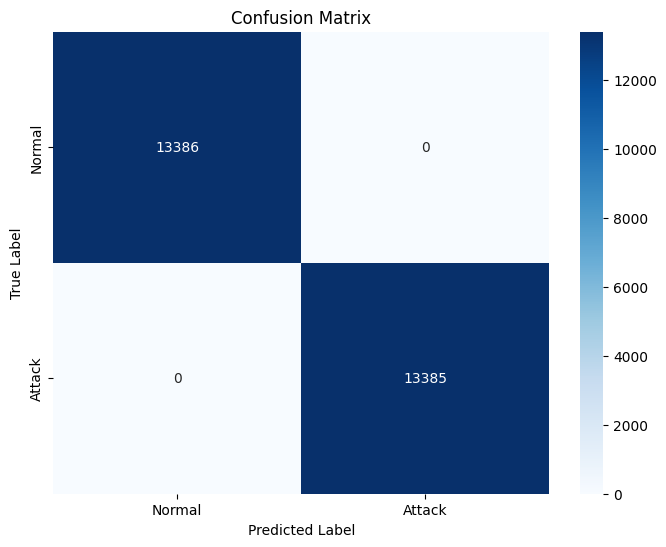

In [15]:
# 3. Enhanced Confusion Matrix with visualization
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Attack'],
            yticklabels=['Normal', 'Attack'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

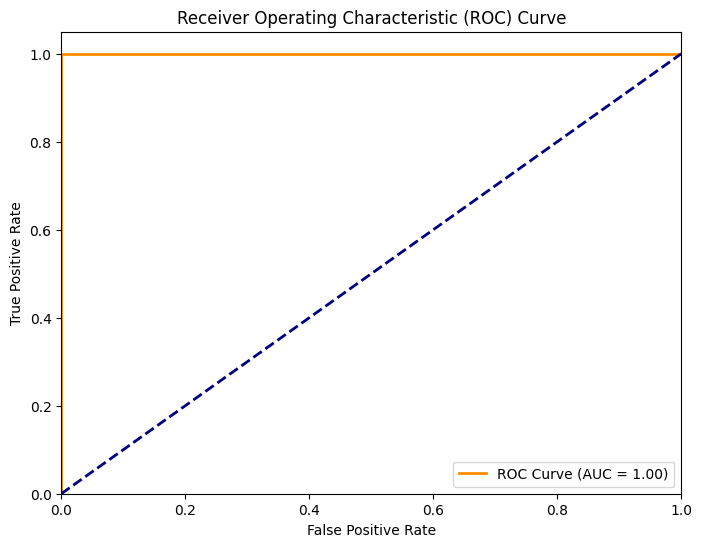

In [16]:
# 4. ROC Curve visualization
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

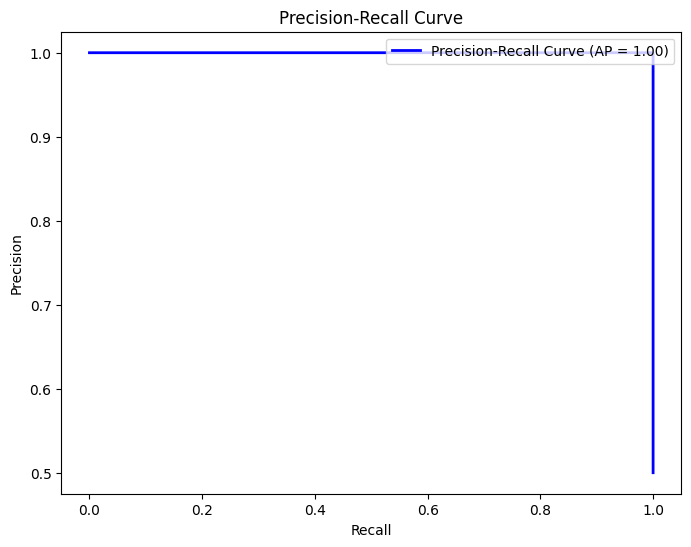

In [17]:
# 5. Precision-Recall Curve (especially important for imbalanced data)
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='blue', lw=2,
         label=f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

In [18]:

# 🔟 Save trained model in .pkl format using joblib
os.makedirs("/trained_models", exist_ok=True)  # Create directory if it doesn't exist
joblib.dump(model, "D:/FYP/models/trained_models/xgboost_native_model.pkl")
print("✅ Trained XGBoost model saved successfully: models/trained_models/xgboost_native_model.pkl")

✅ Trained XGBoost model saved successfully: models/trained_models/xgboost_native_model.pkl
